<a href="https://colab.research.google.com/github/AbuTalhaGT/ML-Algorithms/blob/main/RedWineQuality_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description:

The Red Wine Quality dataset is a popular dataset often used for both classification and regression tasks in machine learning. It contains various physicochemical properties of red wine samples, along with a quality score given by wine experts. The goal is to predict the quality of wine based on its features.

### Dataset Overview

- **Source**: UCI Machine Learning Repository.
- **Number of Instances**: 1,599.
- **Number of Attributes (Features)**: 11.

### Features

The dataset includes 11 physicochemical features that describe the properties of the red wine:

1. **Fixed Acidity**: Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
2. **Volatile Acidity**: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
3. **Citric Acid**: Found in small quantities, citric acid can add ‘freshness’ and flavor to wines.
4. **Residual Sugar**: The amount of sugar remaining after fermentation stops; wines with less than 1 gram/liter are classified as "dry."
5. **Chlorides**: The amount of salt in the wine.
6. **Free Sulfur Dioxide**: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
7. **Total Sulfur Dioxide**: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
8. **Density**: The density of water is close to that of water depending on the percent alcohol and sugar content.
9. **pH**: Describes how acidic or basic a wine is on a scale of 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
10. **Sulphates**: A wine additive that can contribute to sulfur dioxide gas (S02) levels, acts as an antimicrobial and antioxidant.
11. **Alcohol**: The alcohol content of the wine.

### Target Variable

- **Quality**: A score between 0 and 10 assigned by wine experts based on the sensory data. In most cases, it ranges from 3 to 8.

### Problem Formulations

1. **Regression**: The task is to predict the continuous quality score (between 0 and 10) based on the physicochemical properties.
   
2. **Classification**: The task is to classify the wine quality into discrete categories. Typically, the scores are divided into three classes: "low quality" (0–4), "medium quality" (5–6), and "high quality" (7–10). Alternatively, some studies consider a binary classification of "good" (quality >= 7) and "not good" (quality < 7).

### Use Cases

- **Regression Analysis**: To predict the exact quality score as a continuous value.
- **Classification Models**: To predict if a wine is of "good" quality or not, or to classify into multiple quality levels.


### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
wine = pd.read_csv("/content/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Calculate and display the percentage of missing (null) values in each column of a DataFrame named wine.

In [7]:
##Purpose: Calculates the percentage of missing values per column in the wine DataFrame.
round(100*(wine.isnull().sum()/len(wine)),2).sort_values(ascending=False)

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


In [8]:
#Purpose: Calculates the percentage of missing values per row in the wine DataFrame.
round(100 * (wine.isnull().sum(axis=1) / len(wine)), 2).sort_values(ascending=False)


,0
0,0.0
1074,0.0
1072,0.0
1071,0.0
1070,0.0
...,...
530,0.0
529,0.0
528,0.0
527,0.0



## No missing / Null value in either rows or columns¶
## Now check for any duplicate values present in the dataset

In [9]:
dub_wine=wine.copy()  #make a copy of dataframe with different name

dub_wine.drop_duplicates(subset=None,inplace=True) #f any row has the same values in all columns as another row, it will be considered a duplicate.
dub_wine.shape

(1359, 12)


## The shape after running the drop duplicate command is not same as the original dataframe. Hence we can conclude that there were duplicate values in the dataset.


In [10]:
wine=dub_wine #Assign non duplicate data to original data (Now dub_wine and wine reference to same in the memory)


for col in wine:
    print(wine[col].value_counts(ascending=False), '\n\n\n')

fixed acidity
7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: count, Length: 96, dtype: int64 



volatile acidity
0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: count, Length: 143, dtype: int64 



citric acid
0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: count, Length: 80, dtype: int64 



residual sugar
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: count, Length: 91, dtype: int64 



chlorides
0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64 



free sulfur dioxide
6.0     121
5.0      88
15.0     65
12.0


## There seems to be no Junk/Unknown values in the entire dataset, let's go ahead with Data Preparation part.


In [11]:
wine.shape

(1359, 12)

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


## Split Data

In [13]:
from sklearn.model_selection import train_test_split
np.random.seed(2)
df_train,df_test=train_test_split(wine,train_size=0.7,test_size=0.3,random_state=100)

In [14]:
df_train.shape

(951, 12)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 31 to 926
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    float64
 6   total sulfur dioxide  951 non-null    float64
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 96.6 KB


In [16]:
df_test.shape

(408, 12)

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 1573 to 677
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         408 non-null    float64
 1   volatile acidity      408 non-null    float64
 2   citric acid           408 non-null    float64
 3   residual sugar        408 non-null    float64
 4   chlorides             408 non-null    float64
 5   free sulfur dioxide   408 non-null    float64
 6   total sulfur dioxide  408 non-null    float64
 7   density               408 non-null    float64
 8   pH                    408 non-null    float64
 9   sulphates             408 non-null    float64
 10  alcohol               408 non-null    float64
 11  quality               408 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 41.4 KB


In [18]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Exploratory Data Analysis (EDA)

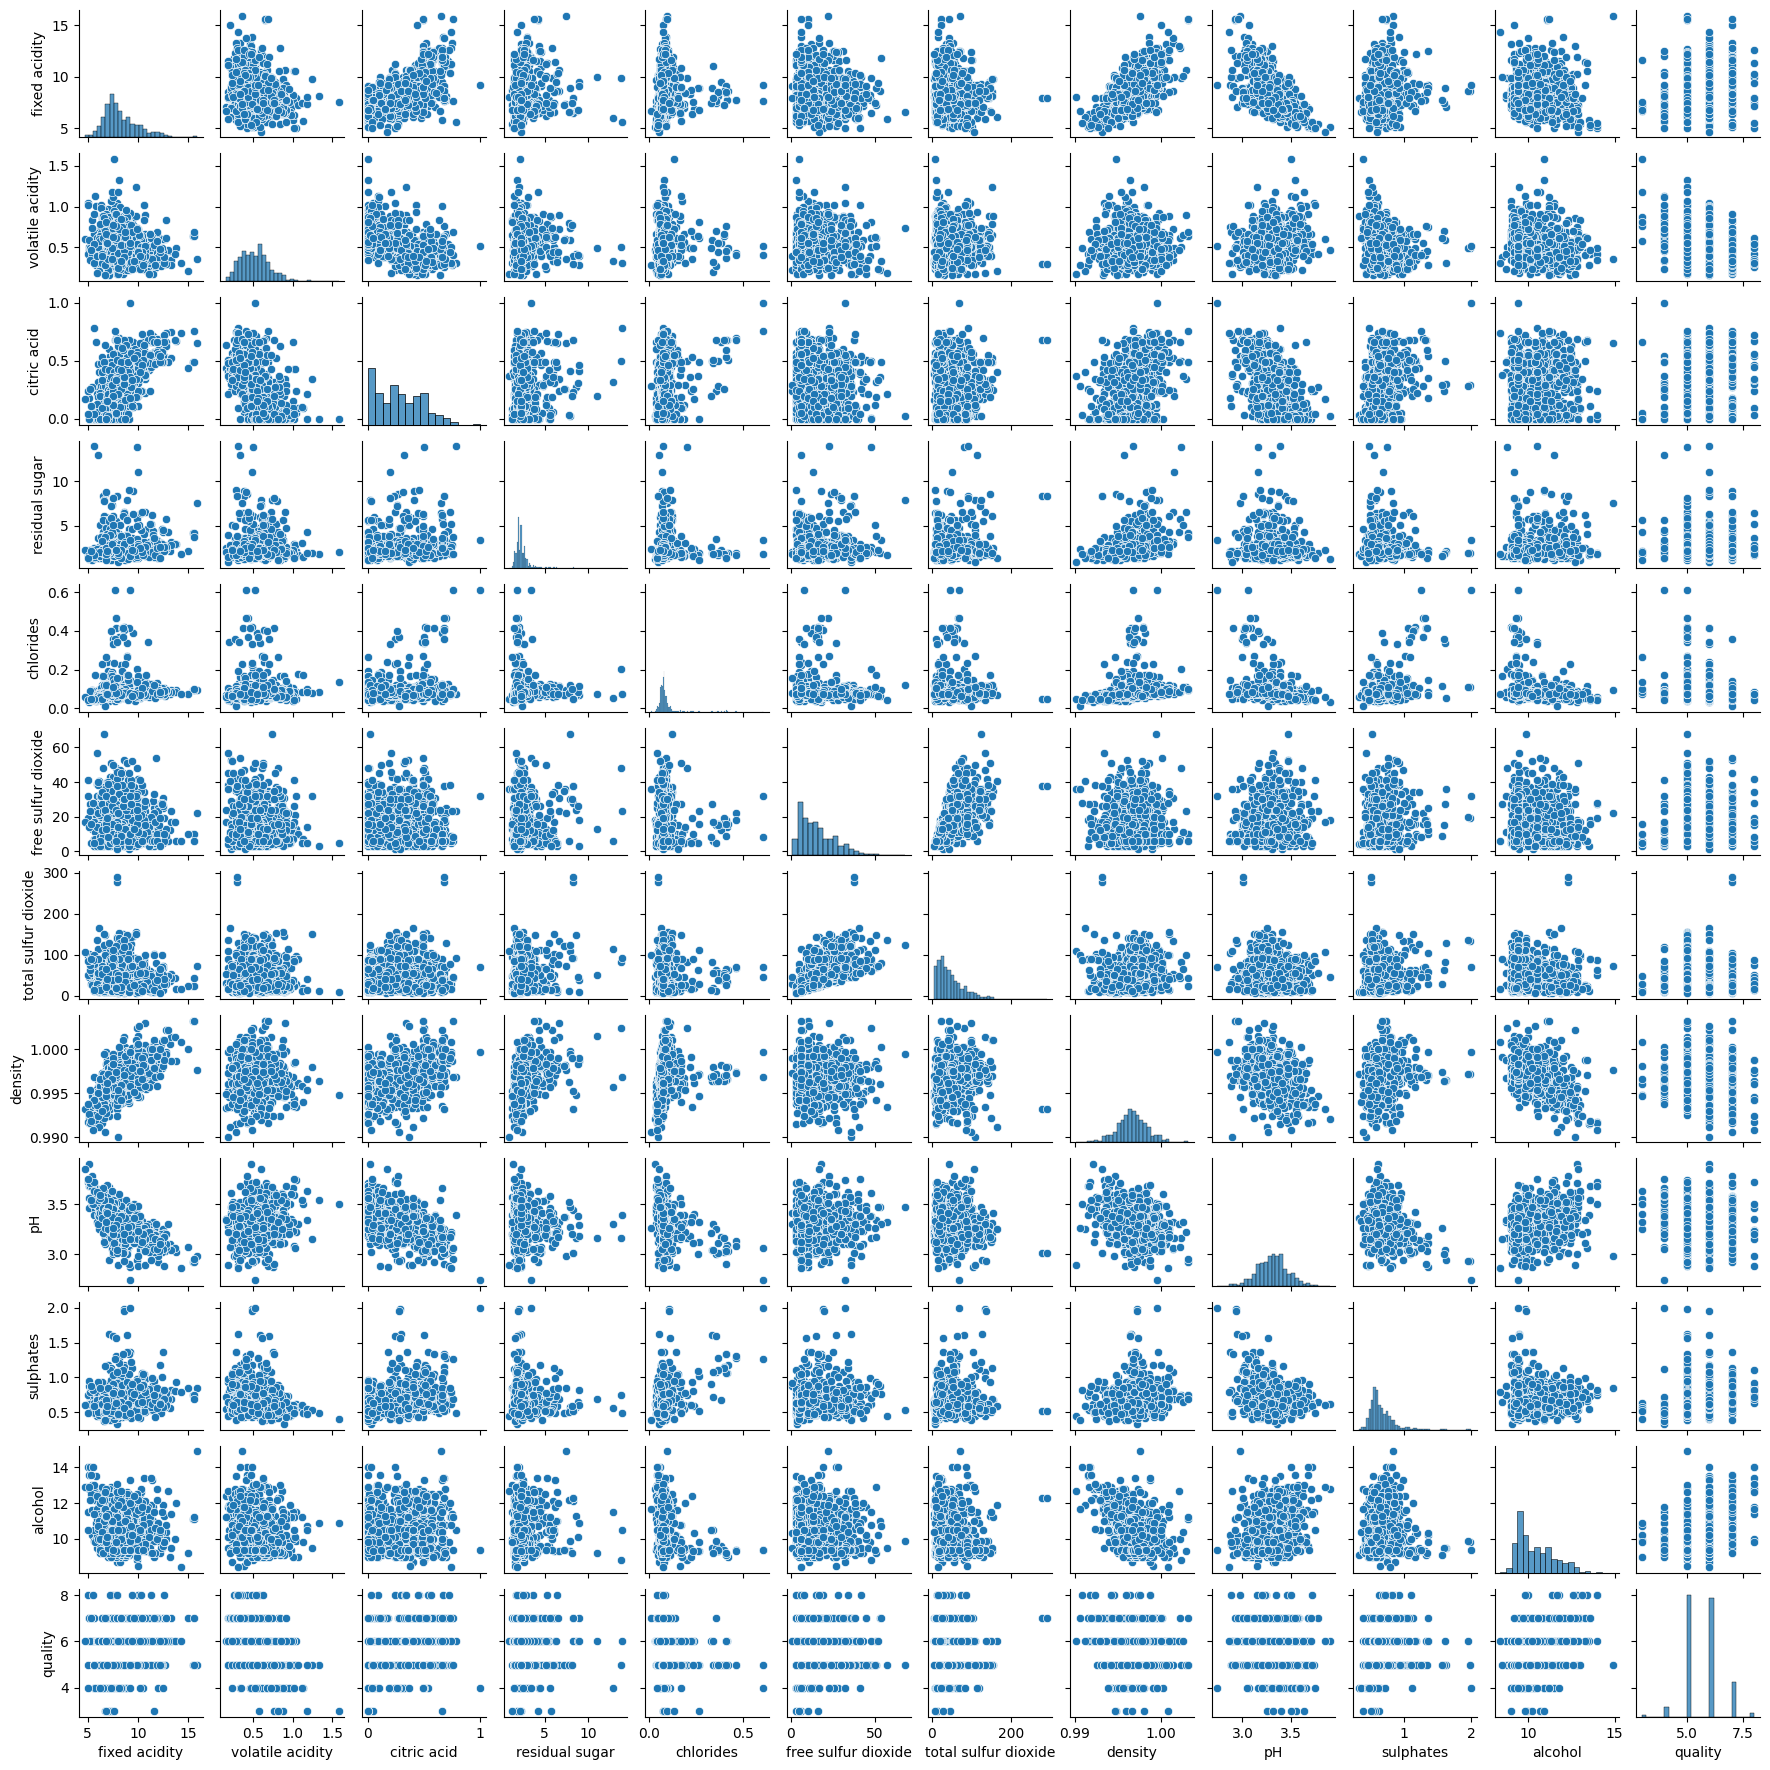

In [19]:
sns.pairplot(df_train,height=1.5)
plt.show()

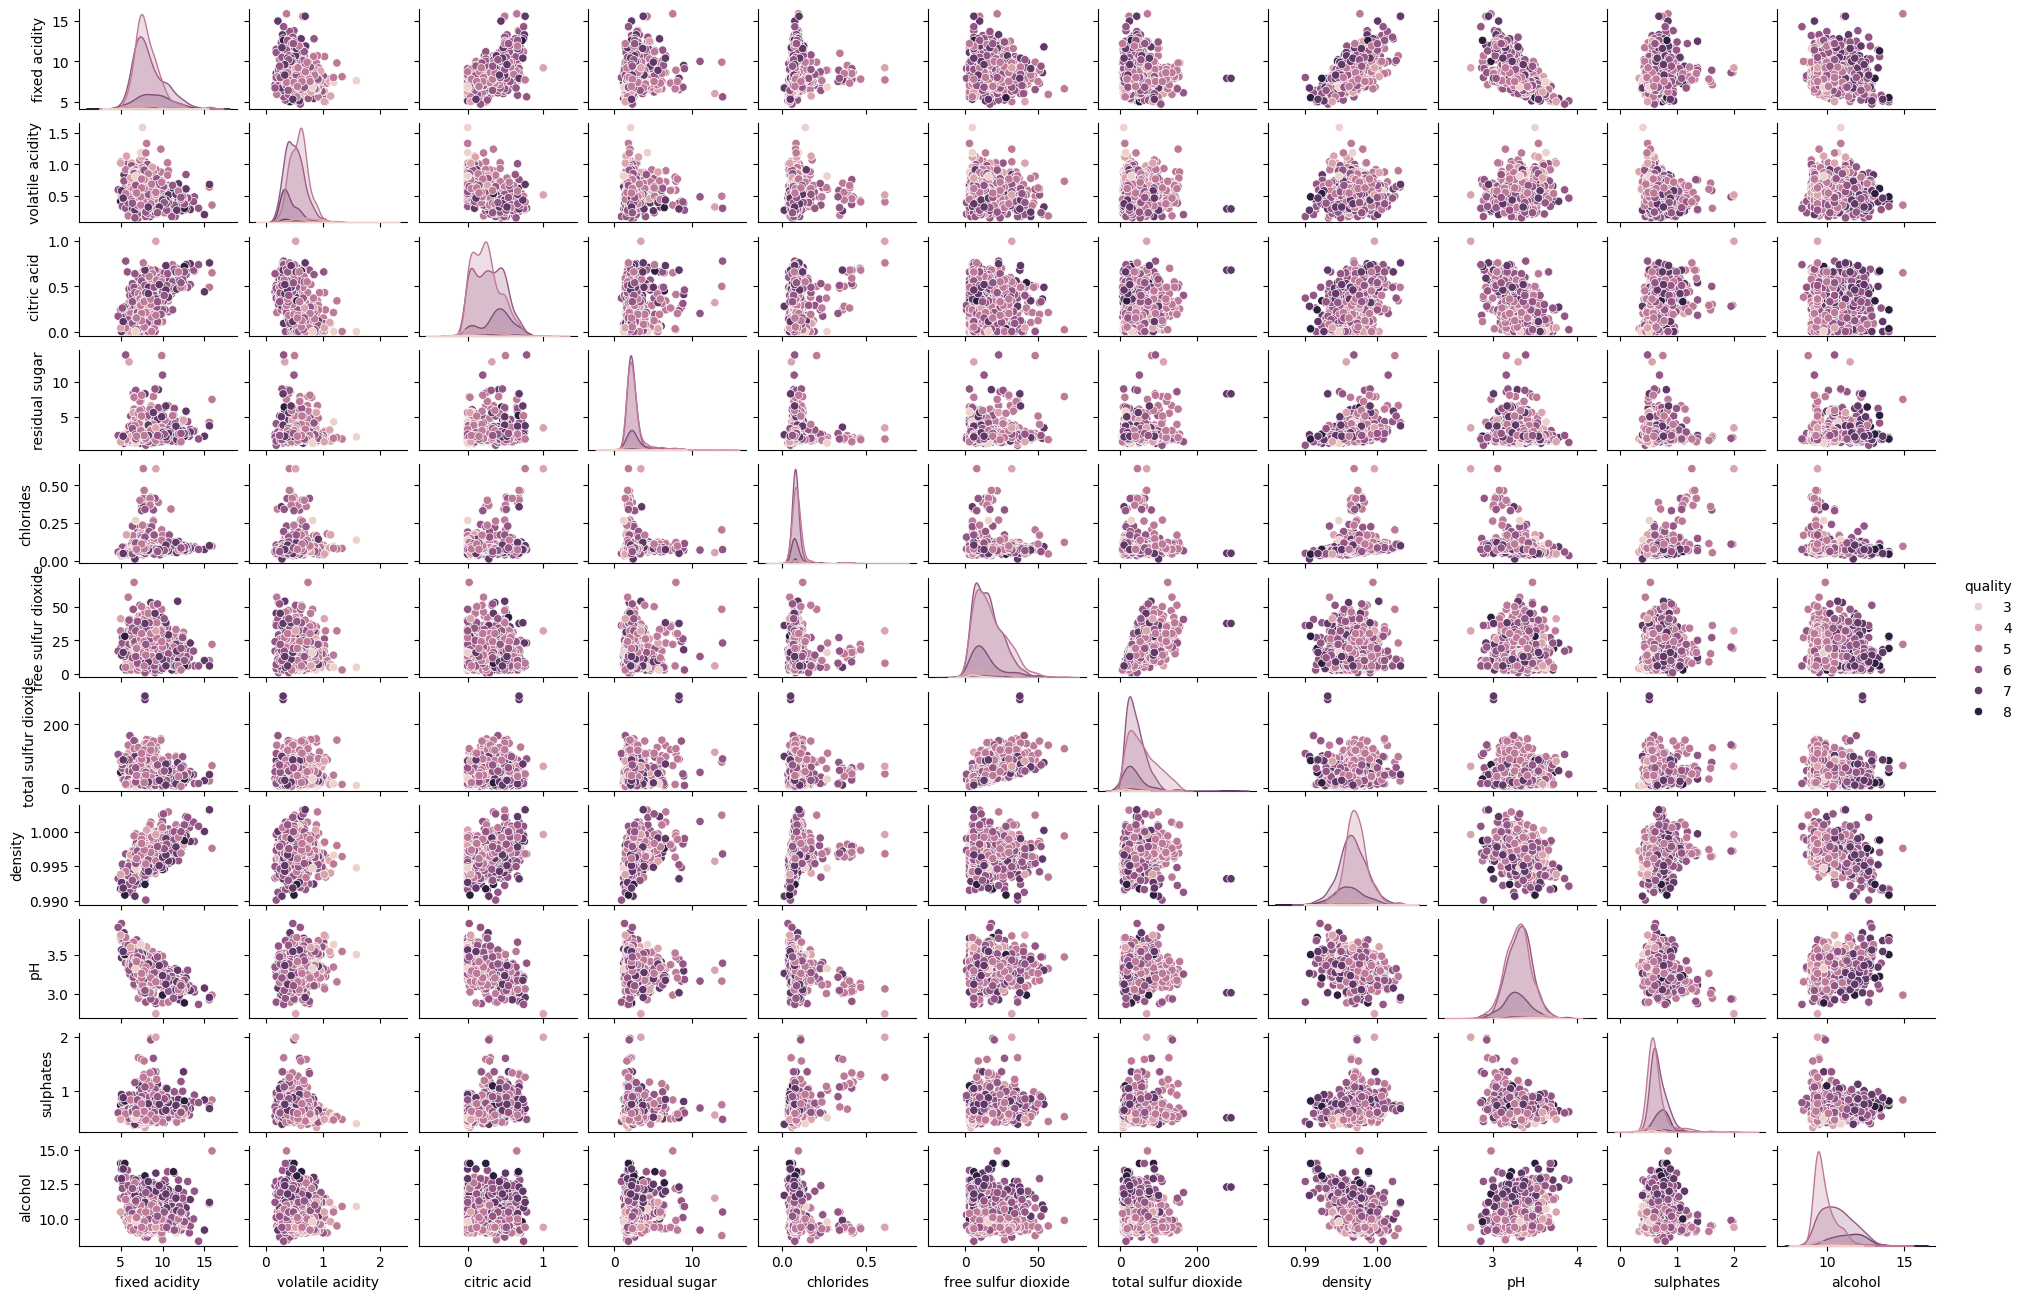

In [20]:
sns.pairplot(df_train, hue='quality', height=1.2, aspect=1.5, diag_kind='kde')
plt.show()

# Correlation Matrix

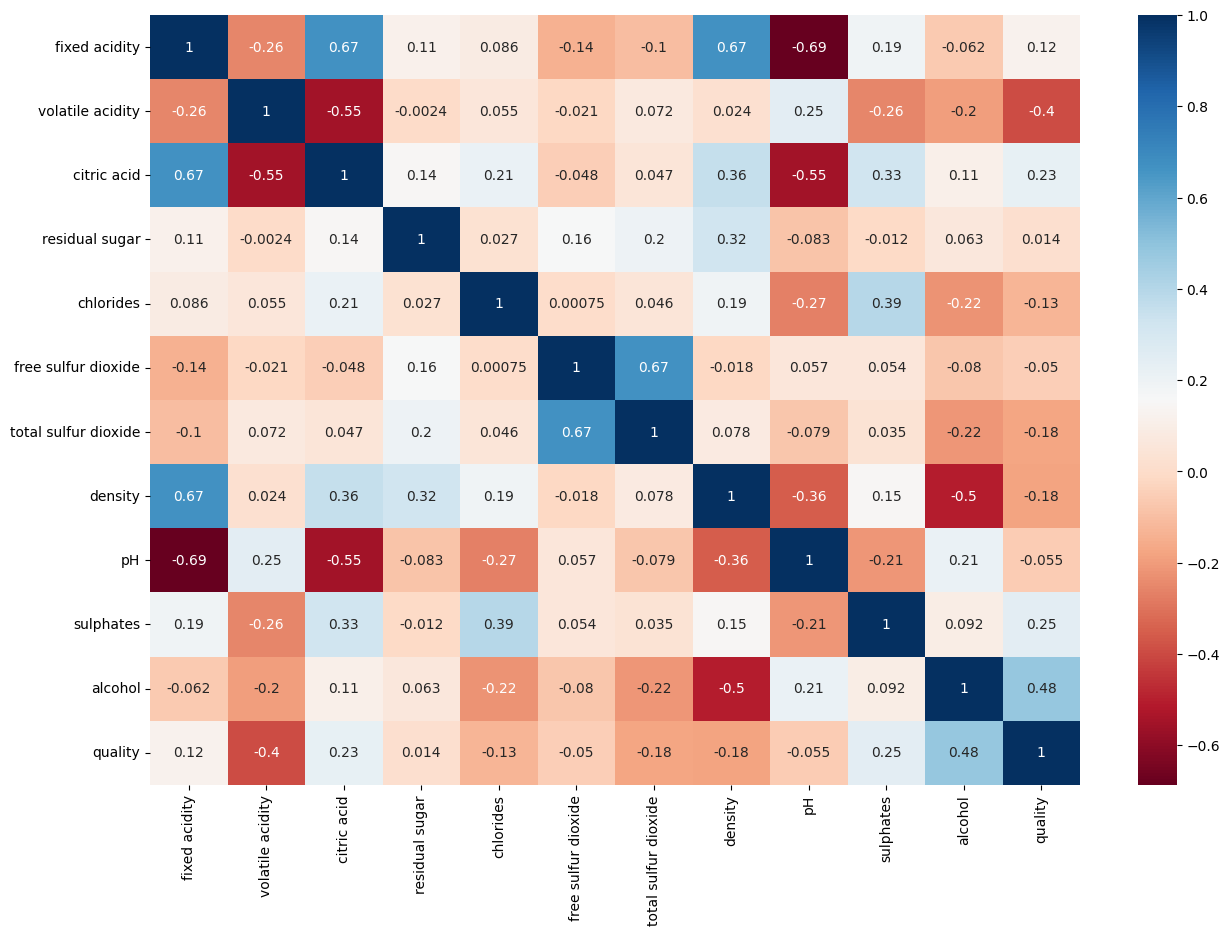

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), annot=True,cmap='RdBu')
plt.show()

### Rescaling : Every value will lie between 0 to 1, using MinMaxScaler.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
371,7.9,0.240,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
952,8.2,0.310,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,7
1037,7.3,0.910,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5
1398,7.0,0.600,0.12,2.2,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,7


In [24]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
df_train[:]=scaler.fit_transform(df_train[:])

In [26]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,0.196429,0.369718,0.00,0.123077,0.155259,0.313433,0.109541,0.497334,0.620690,0.143713,0.338462,0.6
371,0.285714,0.056338,0.40,0.053846,0.073456,0.149254,0.067138,0.504950,0.500000,0.323353,0.046154,0.6
952,0.312500,0.105634,0.40,0.100000,0.076795,0.074627,0.014134,0.402894,0.491379,0.209581,0.430769,0.8
1037,0.232143,0.528169,0.10,0.069231,0.103506,0.283582,0.176678,0.506474,0.525862,0.137725,0.123077,0.4
1398,0.205357,0.309859,0.12,0.100000,0.118531,0.179104,0.077739,0.497334,0.672414,0.173653,0.276923,0.8


In [27]:
y_train=df_train.pop('quality')
X_train=df_train

In [28]:
y_train.head()

,quality
31,0.6
371,0.6
952,0.8
1037,0.4
1398,0.8


In [29]:
X_train.shape

(951, 11)

In [30]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
31,0.196429,0.369718,0.00,0.123077,0.155259,0.313433,0.109541,0.497334,0.620690,0.143713,0.338462
371,0.285714,0.056338,0.40,0.053846,0.073456,0.149254,0.067138,0.504950,0.500000,0.323353,0.046154
952,0.312500,0.105634,0.40,0.100000,0.076795,0.074627,0.014134,0.402894,0.491379,0.209581,0.430769
1037,0.232143,0.528169,0.10,0.069231,0.103506,0.283582,0.176678,0.506474,0.525862,0.137725,0.123077
1398,0.205357,0.309859,0.12,0.100000,0.118531,0.179104,0.077739,0.497334,0.672414,0.173653,0.276923


### RFE (Recursive Feature Elimination) searches through the training dataset for a subset of features beginning with all features and removing them until the desired number remains. It ranks features by importance, removing the least important ones and re-fitting the model. It does this recursively until an optimal number of features is achieved (Source : Medium Blog)

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm,n_features_to_select=9)
rfe = rfe.fit(X_train, y_train)

## rfe:
- rfe stands for Recursive Feature Elimination, which is an object created using the RFE class from the sklearn.feature_selection module.
- RFE is a feature selection method that recursively removes the least important features to select the most relevant features for the model.

## rfe.support_:

- rfe.support_ is an attribute of the RFE object that returns a Boolean mask (a list of True or False values).
- Each value corresponds to a feature in X_train. True indicates that the feature is selected as one of the best features, while False indicates that it is not selected.

## rfe.ranking_:

- rfe.ranking_ is another attribute of the RFE object that returns an array of ranks for each feature in X_train.
- The most important features are assigned a rank of 1, while less important features are assigned higher ranks.
Features with rank 1 are the ones selected by RFE as the best features.

## zip():

- zip() is a built-in Python function that combines multiple iterables (like lists) element-wise into tuples.
- Here, zip() combines three lists: X_train.columns, rfe.support_, and rfe.ranking_, pairing each feature name with its corresponding support_ value and ranking_ value.

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', False, 3),
 ('volatile acidity', True, 1),
 ('citric acid', False, 2),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', True, 1),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_] #selecting features only with rank =1 (highly important) and removing rest

Index(['fixed acidity', 'citric acid'], dtype='object')

In [38]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
31,0.369718,0.123077,0.155259,0.313433,0.109541,0.497334,0.620690,0.143713,0.338462
371,0.056338,0.053846,0.073456,0.149254,0.067138,0.504950,0.500000,0.323353,0.046154
952,0.105634,0.100000,0.076795,0.074627,0.014134,0.402894,0.491379,0.209581,0.430769
1037,0.528169,0.069231,0.103506,0.283582,0.176678,0.506474,0.525862,0.137725,0.123077
1398,0.309859,0.100000,0.118531,0.179104,0.077739,0.497334,0.672414,0.173653,0.276923


## VIF is a measure of multicollinearity among features in a regression model.

### Features with high VIF values indicate high multicollinearity, which can negatively affect regression model performance and should be considered for removal or adjustment.


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,pH,12.95
5,density,11.41
7,sulphates,6.36
0,volatile acidity,6.00
3,free sulfur dioxide,5.81
8,alcohol,5.48
4,total sulfur dioxide,4.90
2,chlorides,4.05
1,residual sugar,3.29


- VIF > 10: Indicates high multicollinearity, which is problematic. Such features should be considered for removal.
- VIF between 5 and 10: Moderate multicollinearity. These features may need to be reviewed.
- VIF < 5: Low multicollinearity, considered acceptable

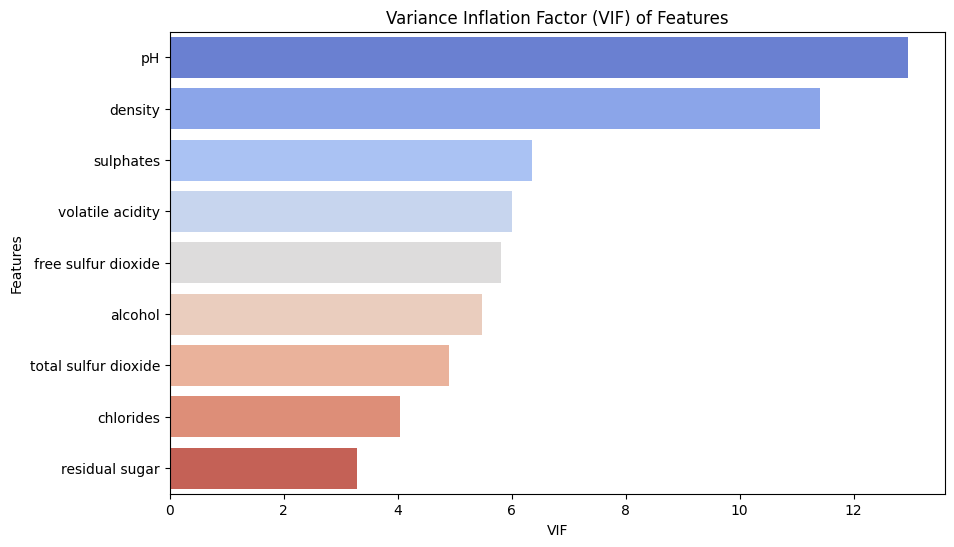

In [45]:
# Bar plot for VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Features', data=vif, palette='coolwarm')

# Add titles and labels
plt.title('Variance Inflation Factor (VIF) of Features')
plt.xlabel('VIF')
plt.ylabel('Features')

# Show the plot
plt.show()

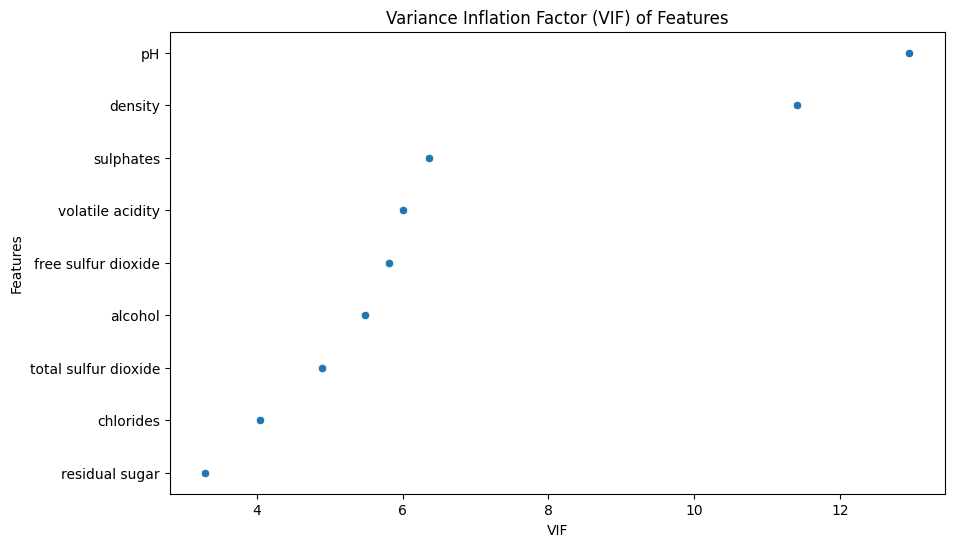

In [49]:
# Scatter plot for VIF values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VIF', y='Features', data=vif, palette='coolwarm')

# Add titles and labels
plt.title('Variance Inflation Factor (VIF) of Features')
plt.xlabel('VIF')
plt.ylabel('Features')

# Show the plot
plt.show()

## Linear Model

In [50]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [51]:
lr1.params #to get the parameters (coefficient)

,0
const,0.511514
volatile acidity,-0.293889
residual sugar,-0.023075
chlorides,-0.226907
free sulfur dioxide,0.047656
total sulfur dioxide,-0.170749
density,0.030913
pH,-0.103709
sulphates,0.251518
alcohol,0.400770


In [52]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     59.68
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           3.04e-86
Time:                        04:49:43   Log-Likelihood:                 598.76
No. Observations:                 951   AIC:                            -1178.
Df Residuals:                     941   BIC:                            -1129.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5115 